In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from helpers import *

In [28]:
#merging all the datasets into one
mergestorm_df = pd.concat( 
    map(pd.read_csv, ["resources/stormevents_2022.csv", 
                      "resources/stormevents_2021.csv",
                      "resources/stormevents_2020.csv",
                      "resources/stormevents_2019.csv",
                      "resources/stormevents_2018.csv", 
                      "resources/stormevents_2017.csv", 
                      "resources/stormevents_2016.csv", 
                      "resources/stormevents_2015.csv", 
                      "resources/stormevents_2014.csv", 
                      "resources/stormevents_2013.csv", 
                      "resources/stormevents_2012.csv", 
                      "resources/stormevents_2011.csv", 
                      "resources/stormevents_2010.csv", 
                      "resources/stormevents_2009.csv", 
                      "resources/stormevents_2008.csv"]), ignore_index=True) 
mergestorm_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202202,20,2118,202202,20,2218,165464,999902,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong winds increased ahead of an approaching...,"Station (UP994) 3.1 SE West Wendover, Elevatio...",CSV
1,202202,21,800,202202,22,1000,165465,999903,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Thirteen inches fell at station (BCSN2) Big Cr...,CSV
2,202202,22,200,202202,22,900,165465,999904,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Fifteen inches fell at station (TJMN2) Toe Jam...,CSV
3,202202,18,1609,202202,18,1609,165611,1001181,ATLANTIC SOUTH,87,...,7.0,SE,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,Pre-frontal showers and thunderstorms moved so...,A brief waterspout was observed offshore of So...,CSV
4,202202,2,0,202202,3,0,165668,1001527,AMERICAN SAMOA,97,...,5.0,NNW,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,A surface trough over the Islands held the po...,"Over a 24-hour period, WSO Pago Pago recorded ...",CSV


In [29]:
# Create a DataFrame with selected columns 
clean_mergestorm_df = mergestorm_df[["YEAR","EPISODE_ID", "EVENT_ID", "STATE", "EVENT_TYPE",  
                                "INJURIES_DIRECT", "INJURIES_INDIRECT","DEATHS_DIRECT", "DEATHS_INDIRECT",
                                "DAMAGE_PROPERTY","DAMAGE_CROPS", "SOURCE", "MAGNITUDE", "MAGNITUDE_TYPE", 
                                "TOR_F_SCALE", "TOR_LENGTH", "TOR_WIDTH", "TOR_OTHER_CZ_STATE", "BEGIN_LOCATION", 
                                "BEGIN_LAT", "BEGIN_LON", "END_LAT", "END_LON"]]
clean_mergestorm_df.head()

,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,...,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,2022,165464,999902,NEVADA,High Wind,0,0,0,0,0.00K,...,MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,165465,999903,NEVADA,Heavy Snow,0,0,0,0,0.00K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,165465,999904,NEVADA,Heavy Snow,0,0,0,0,0.00K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,165611,1001181,ATLANTIC SOUTH,Waterspout,0,0,0,0,0.00K,...,NaN,NaN,NaN,NaN,NaN,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700
4,2022,165668,1001527,AMERICAN SAMOA,Heavy Rain,0,0,0,0,50.00K,...,NaN,NaN,NaN,NaN,NaN,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268


In [30]:
clean_mergestorm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948286 entries, 0 to 948285
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                948286 non-null  int64  
 1   EPISODE_ID          948286 non-null  int64  
 2   EVENT_ID            948286 non-null  int64  
 3   STATE               948286 non-null  object 
 4   EVENT_TYPE          948286 non-null  object 
 5   INJURIES_DIRECT     948286 non-null  int64  
 6   INJURIES_INDIRECT   948286 non-null  int64  
 7   DEATHS_DIRECT       948286 non-null  int64  
 8   DEATHS_INDIRECT     948286 non-null  int64  
 9   DAMAGE_PROPERTY     777435 non-null  object 
 10  DAMAGE_CROPS        775903 non-null  object 
 11  SOURCE              948286 non-null  object 
 12  MAGNITUDE           500839 non-null  float64
 13  MAGNITUDE_TYPE      340870 non-null  object 
 14  TOR_F_SCALE         21140 non-null   object 
 15  TOR_LENGTH          21140 non-null

In [31]:
#convert property damages from object to string 
retype_damage_col(clean_mergestorm_df)
clean_mergestorm_df.info()

C:\Users\juggl\desktop\Data_Bootcamp\Projects\team1\helpers.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  #data['DAMAGE_CROPS'] = data['DAMAGE_CROPS'].apply(retype_damage_value)
C:\Users\juggl\desktop\Data_Bootcamp\Projects\team1\helpers.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  #data['DAMAGE_PROPERTY'] = data['DAMAGE_PROPERTY'].apply(retype_damage_value)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948286 entries, 0 to 948285
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                948286 non-null  int64  
 1   EPISODE_ID          948286 non-null  int64  
 2   EVENT_ID            948286 non-null  int64  
 3   STATE               948286 non-null  object 
 4   EVENT_TYPE          948286 non-null  object 
 5   INJURIES_DIRECT     948286 non-null  int64  
 6   INJURIES_INDIRECT   948286 non-null  int64  
 7   DEATHS_DIRECT       948286 non-null  int64  
 8   DEATHS_INDIRECT     948286 non-null  int64  
 9   DAMAGE_PROPERTY     948286 non-null  float64
 10  DAMAGE_CROPS        948286 non-null  float64
 11  SOURCE              948286 non-null  object 
 12  MAGNITUDE           500839 non-null  float64
 13  MAGNITUDE_TYPE      340870 non-null  object 
 14  TOR_F_SCALE         21140 non-null   object 
 15  TOR_LENGTH          21140 non-null

In [32]:
clean_mergestorm_df["DAMAGE_PROPERTY"].value_counts()

DAMAGE_PROPERTY
0.0            733959
1000.0          29178
5000.0          26815
10000.0         22795
2000.0          19475
                ...  
68900000.0          1
360000000.0         1
116400000.0         1
942000.0            1
242000.0            1
Name: count, Length: 1397, dtype: int64

In [33]:
# Add new columns that combine direct and indirect deaths; direct and indirect injuries; and property damage and crop damage
clean_mergestorm_df.loc[:,"TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
clean_mergestorm_df.loc[:,"TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]
clean_mergestorm_df["TOTAL DAMAGES"] = clean_mergestorm_df["DAMAGE_PROPERTY"] + clean_mergestorm_df["DAMAGE_CROPS"]

clean_mergestorm_df.tail()

C:\Users\juggl\AppData\Local\Temp\ipykernel_23448\1318311347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df.loc[:,"TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
C:\Users\juggl\AppData\Local\Temp\ipykernel_23448\1318311347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df.loc[:,"TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]
C:\Users\juggl\AppData\Local\Temp\ip

,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,...,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
948281,2008,18919,111312,FLORIDA,Hail,0,0,0,0,0.0,...,NaN,NaN,RITAL,28.5233,-82.2320,28.5233,-82.2320,0,0,0.0
948282,2008,18495,108243,FLORIDA,Thunderstorm Wind,0,0,0,0,500.0,...,NaN,NaN,HULL,27.1323,-81.9050,27.1323,-81.9050,0,0,500.0
948283,2008,18708,109851,GULF OF MEXICO,Marine Thunderstorm Wind,0,0,0,0,0.0,...,NaN,NaN,MIDDLE TAMPA BAY,27.7651,-82.6270,27.7651,-82.6270,0,0,0.0
948284,2008,16372,94501,FLORIDA,Hail,0,0,0,0,0.0,...,NaN,NaN,THONOTOSASSA,28.0762,-82.2492,28.0762,-82.2492,0,0,0.0
948285,2008,18495,108160,FLORIDA,Lightning,0,0,0,0,500.0,...,NaN,NaN,SAFETY HARBOR,27.9824,-82.7087,27.9824,-82.7087,0,0,500.0


In [46]:
drop_merged_df = clean_mergestorm_df.drop(columns=["INJURIES_DIRECT", "INJURIES_INDIRECT","DEATHS_DIRECT", "DEATHS_INDIRECT"])
drop_merged_df.head()

,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,...,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,2022,165464,999902,NEVADA,High Wind,0.0,0.0,Mesonet,36.0,MS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0
1,2022,165465,999903,NEVADA,Heavy Snow,0.0,0.0,SNOTEL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0
2,2022,165465,999904,NEVADA,Heavy Snow,0.0,0.0,SNOTEL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0
3,2022,165611,1001181,ATLANTIC SOUTH,Waterspout,0.0,0.0,Trained Spotter,NaN,NaN,...,NaN,NaN,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,0,0,0.0
4,2022,165668,1001527,AMERICAN SAMOA,Heavy Rain,50000.0,0.0,Official NWS Observations,NaN,NaN,...,NaN,NaN,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,0,0,50000.0


In [45]:
drop_merged_df[["TOTAL DEATHS", "TOTAL INJURIES"]].value_counts()

TOTAL DEATHS  TOTAL INJURIES
0             0                 934362
1             0                   4554
0             1                   3415
              2                   1206
2             0                    697
                                 ...  
              175                    1
              250                    1
              353                    1
3             11                     1
161           1150                   1
Name: count, Length: 349, dtype: int64

In [36]:
print(clean_mergestorm_df["DEATHS_DIRECT"].sum()+clean_mergestorm_df["DEATHS_INDIRECT"].sum()  )
print(clean_mergestorm_df["INJURIES_DIRECT"].sum()+clean_mergestorm_df["INJURIES_INDIRECT"].sum()  )
print(drop_merged_df[["TOTAL DEATHS", "TOTAL INJURIES"]].sum())

12198
48392
TOTAL DEATHS      12198
TOTAL INJURIES    48392
dtype: int64


In [47]:
# Narrow down events that have had at least one death and/or at least one injury 
narrow_df = drop_merged_df.loc[(drop_merged_df["TOTAL DEATHS"] > 0) | (drop_merged_df["TOTAL INJURIES"] > 0) 
| (drop_merged_df["TOTAL DAMAGES"] > 0),]

# reset the index 
narrow_df.reset_index(drop=True, inplace=True)

# Display sample data
narrow_df.head()

,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,...,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,2022,165668,1001527,AMERICAN SAMOA,Heavy Rain,50000.0,0.0,Official NWS Observations,NaN,NaN,...,NaN,NaN,VAITOGI,-14.3330,-170.7157,-14.3393,-170.7268,0,0,50000.0
1,2022,165593,1001094,FLORIDA,Dense Fog,0.0,0.0,Emergency Manager,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,30,0.0
2,2022,168040,1034259,LOUISIANA,Tornado,50000.0,0.0,NWS Storm Survey,NaN,NaN,...,25.0,NaN,DEHLCO,32.3733,-91.7256,32.3934,-91.7065,0,0,50000.0
3,2022,168040,1034260,LOUISIANA,Tornado,85000.0,0.0,NWS Storm Survey,NaN,NaN,...,350.0,NaN,WINNSBORO MUNI ARPT,32.1463,-91.6868,32.2071,-91.5956,0,0,85000.0
4,2022,168039,1035604,MISSISSIPPI,Tornado,35000.0,0.0,NWS Storm Survey,NaN,NaN,...,125.0,NaN,ENTERPRISE,32.1860,-88.8433,32.2080,-88.8179,0,0,35000.0


In [38]:
# Export the narrowed data into a csv
narrow_df.to_csv("narrow_df2.csv")



In [41]:
# Read saved data
new = pd.read_csv("narrow_df2.csv")

# Display sample data
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230843 entries, 0 to 230842
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          230843 non-null  int64  
 1   YEAR                230843 non-null  int64  
 2   EPISODE_ID          230843 non-null  int64  
 3   EVENT_ID            230843 non-null  int64  
 4   STATE               230843 non-null  object 
 5   EVENT_TYPE          230843 non-null  object 
 6   DAMAGE_PROPERTY     230843 non-null  float64
 7   DAMAGE_CROPS        230843 non-null  float64
 8   SOURCE              230843 non-null  object 
 9   MAGNITUDE           151721 non-null  float64
 10  MAGNITUDE_TYPE      139262 non-null  object 
 11  TOR_F_SCALE         11576 non-null   object 
 12  TOR_LENGTH          11576 non-null   float64
 13  TOR_WIDTH           11576 non-null   float64
 14  TOR_OTHER_CZ_STATE  1894 non-null    object 
 15  BEGIN_LOCATION      183753 non-nul

In [50]:
reordernarrow_df = narrow_df[["YEAR","EPISODE_ID", "EVENT_ID", "STATE", "EVENT_TYPE",  
                              "TOTAL DEATHS", "TOTAL INJURIES", "TOTAL DAMAGES",
                              "DAMAGE_PROPERTY","DAMAGE_CROPS", "SOURCE", "MAGNITUDE", "MAGNITUDE_TYPE", "TOR_F_SCALE", "TOR_LENGTH", "TOR_WIDTH", "TOR_OTHER_CZ_STATE", "BEGIN_LOCATION", "BEGIN_LAT", "BEGIN_LON", "END_LAT", "END_LON"]]
reordernarrow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230843 entries, 0 to 230842
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                230843 non-null  int64  
 1   EPISODE_ID          230843 non-null  int64  
 2   EVENT_ID            230843 non-null  int64  
 3   STATE               230843 non-null  object 
 4   EVENT_TYPE          230843 non-null  object 
 5   TOTAL DEATHS        230843 non-null  int64  
 6   TOTAL INJURIES      230843 non-null  int64  
 7   TOTAL DAMAGES       230843 non-null  float64
 8   DAMAGE_PROPERTY     230843 non-null  float64
 9   DAMAGE_CROPS        230843 non-null  float64
 10  SOURCE              230843 non-null  object 
 11  MAGNITUDE           151721 non-null  float64
 12  MAGNITUDE_TYPE      139262 non-null  object 
 13  TOR_F_SCALE         11576 non-null   object 
 14  TOR_LENGTH          11576 non-null   float64
 15  TOR_WIDTH           11576 non-null

In [51]:
reordernarrow_df.sort_values(["TOTAL DAMAGES"], ascending=False)


,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,DAMAGE_PROPERTY,DAMAGE_CROPS,...,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
59111,2018,131864,788675,CALIFORNIA,Wildfire,86,12,1.700000e+10,1.700000e+10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79347,2017,119753,720861,TEXAS,Flash Flood,38,0,1.000010e+10,1.000000e+10,100000.0,...,NaN,NaN,NaN,NaN,NaN,JOYCE,29.5688,-95.0139,29.6026,-95.3778
79132,2017,119753,720871,TEXAS,Flash Flood,6,0,1.000001e+10,1.000000e+10,10000.0,...,NaN,NaN,NaN,NaN,NaN,SAN LEON,29.4972,-94.9164,29.3800,-94.8669
79058,2017,119753,720852,TEXAS,Flash Flood,3,0,8.000050e+09,8.000000e+09,50000.0,...,NaN,NaN,NaN,NaN,NaN,KENDLETON,29.4493,-96.0027,29.8075,-95.8090
139826,2012,68471,416942,NEW JERSEY,Coastal Flood,0,0,7.500000e+09,7.500000e+09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129934,2013,73604,445350,ALABAMA,Thunderstorm Wind,1,0,0.000000e+00,0.000000e+00,0.0,...,EG,NaN,NaN,NaN,NaN,FARLEY NUCLEAR PLANT,31.2200,-85.1100,31.2200,-85.1100
56968,2018,127257,769097,INDIANA,Thunderstorm Wind,1,0,0.000000e+00,0.000000e+00,0.0,...,EG,NaN,NaN,NaN,NaN,PAYNE,39.0759,-86.4240,39.0759,-86.4240
129935,2013,71976,446482,PENNSYLVANIA,Thunderstorm Wind,0,1,0.000000e+00,0.000000e+00,0.0,...,EG,NaN,NaN,NaN,NaN,NEWHARD,40.7197,-75.6039,40.7197,-75.6039
216744,2008,25395,148069,WISCONSIN,Winter Storm,1,0,0.000000e+00,0.000000e+00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
reordernarrow_df.loc[reordernarrow_df["EVENT_ID"] ==445350,["DAMAGE_PROPERTY","DAMAGE_CROPS"]]

,DAMAGE_PROPERTY,DAMAGE_CROPS
129934,0.0,0.0


In [53]:
sorted_df =reordernarrow_df.sort_values(["TOTAL DEATHS","TOTAL INJURIES"], ascending=False)
sorted_df

,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
9652,2011,49972,296617,MISSOURI,Tornado,161,1150,2.80B,0.0,NWS Storm Survey,...,NaN,EF5,8.8,1600.0,MO,CENTRAL CITY,37.0560,-94.5701,37.0544,-94.4105
1098,2021,158241,961302,OREGON,Excessive Heat,93,0,50.00K,50000.0,ASOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3640,2018,131864,788675,CALIFORNIA,Wildfire,86,12,17.00B,0.0,Fire Department/Rescue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,2022,174632,1058654,FLORIDA,Hurricane,60,0,7.00B,0.0,Official NWS Observations,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,2022,171258,1039790,TEXAS,Heat,53,0,0.00K,0.0,Broadcast Media,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13904,2008,17046,98570,FLORIDA,Lightning,0,1,0.00K,0.0,Broadcast Media,...,NaN,NaN,NaN,NaN,NaN,GAINESVILLE NORTH,29.6700,-82.3400,29.6700,-82.3400
13907,2008,17418,106822,IOWA,Thunderstorm Wind,0,1,10.00K,0.0,Newspaper,...,EG,NaN,NaN,NaN,NaN,MILLERSBURG,41.5495,-92.1974,41.5495,-92.1974
13909,2008,18506,108216,MISSOURI,Hail,0,1,0.00K,0.0,Emergency Manager,...,NaN,NaN,NaN,NaN,NaN,SCHELL CITY,38.0200,-94.1200,38.0200,-94.1200
13913,2008,21508,127149,FLORIDA,Lightning,0,1,0.00K,0.0,Newspaper,...,NaN,NaN,NaN,NaN,NaN,INDIAN RIVER SHRS,27.6700,-80.3800,27.6700,-80.3800


In [56]:
test = reordernarrow_df[["EPISODE_ID","EVENT_TYPE","STATE","TOTAL DEATHS", "TOTAL INJURIES", "TOTAL DAMAGES"]].groupby("EPISODE_ID").sum()
test.sort_values(["TOTAL DEATHS","TOTAL INJURIES"], ascending=False).head(30)

,EVENT_TYPE,STATE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
EPISODE_ID,,,,,
49972,Thunderstorm WindThunderstorm WindThunderstorm...,MISSOURIMISSOURIMISSOURIMISSOURIMISSOURIMISSOU...,162,1153,2.803361e+09
50455,TornadoTornadoTornadoTornadoTornadoTornadoTorn...,ALABAMAALABAMAALABAMAALABAMAALABAMAALABAMAALAB...,149,2001,3.183960e+09
158241,Excessive HeatExcessive HeatExcessive HeatExce...,OREGONOREGONOREGONOREGONOREGONOREGONOREGON,118,0,1.000000e+05
50516,TornadoTornadoTornadoThunderstorm WindThunders...,ALABAMAALABAMAALABAMAALABAMAALABAMAALABAMAALAB...,100,124,1.111358e+09
174632,HurricaneHurricaneHurricaneHurricaneTropical S...,FLORIDAFLORIDAFLORIDAFLORIDAFLORIDAFLORIDAFLOR...,90,0,1.316142e+10
131864,Wildfire,CALIFORNIA,86,12,1.700000e+10
175040,Excessive HeatExcessive HeatExcessive HeatExce...,ARIZONAARIZONAARIZONAARIZONAARIZONAARIZONAARIZONA,60,0,0.000000e+00
156251,Extreme Cold/Wind ChillExtreme Cold/Wind Chill...,TEXASTEXASTEXASTEXASTEXASTEXASTEXASTEXASTEXAST...,59,0,6.067400e+07
164438,TornadoTornadoTornadoTornadoTornadoTornadoThun...,KENTUCKYKENTUCKYKENTUCKYKENTUCKYKENTUCKYKENTUC...,58,519,4.200000e+05


In [57]:
test.sort_values(["TOTAL DAMAGES"], ascending=False).head(30)

,EVENT_TYPE,STATE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
EPISODE_ID,,,,,
119753,TornadoTropical StormTornadoTornadoTornadoTorn...,TEXASTEXASTEXASTEXASTEXASTEXASTEXASTEXASTEXAST...,55,0,4.112373e+10
68471,High WindHigh WindHigh WindHigh WindHigh WindH...,NEW JERSEYNEW JERSEYNEW JERSEYNEW JERSEYNEW JE...,27,3,2.495909e+10
120357,HurricaneHurricaneFlash FloodFlash FloodHurric...,PUERTO RICOPUERTO RICOPUERTO RICOPUERTO RICOPU...,20,0,1.826375e+10
131864,Wildfire,CALIFORNIA,86,12,1.700000e+10
23202,Hurricane (Typhoon)Storm Surge/TideHurricane (...,TEXASTEXASTEXASTEXASTEXASTEXASTEXASTEXASTEXAST...,36,2409,1.343108e+10
174632,HurricaneHurricaneHurricaneHurricaneTropical S...,FLORIDAFLORIDAFLORIDAFLORIDAFLORIDAFLORIDAFLOR...,90,0,1.316142e+10
162128,TornadoTornadoStorm Surge/TideStorm Surge/Tide...,LOUISIANALOUISIANALOUISIANALOUISIANALOUISIANAL...,30,0,1.214762e+10
152321,Tropical StormTropical StormHurricaneTropical ...,LOUISIANALOUISIANALOUISIANALOUISIANALOUISIANAL...,23,0,1.067900e+10
109514,Flash FloodFlash FloodFloodFlash FloodFlash Fl...,LOUISIANALOUISIANALOUISIANALOUISIANALOUISIANAL...,12,0,6.792776e+09


In [49]:
groupbynarrow_df=reordernarrow_df.sort_values(["TOTAL DEATHS","TOTAL INJURIES"], ascending=False).groupby("TOTAL DEATHS").head()
groupbynarrow_df.head()

,YEAR,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
9652,2011,49972,296617,MISSOURI,Tornado,161,1150,2.80B,0.0,NWS Storm Survey,...,NaN,EF5,8.8,1600.0,MO,CENTRAL CITY,37.056,-94.5701,37.0544,-94.4105
1098,2021,158241,961302,OREGON,Excessive Heat,93,0,50.00K,50000.0,ASOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3640,2018,131864,788675,CALIFORNIA,Wildfire,86,12,17.00B,0.0,Fire Department/Rescue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,2022,174632,1058654,FLORIDA,Hurricane,60,0,7.00B,0.0,Official NWS Observations,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,2022,171258,1039790,TEXAS,Heat,53,0,0.00K,0.0,Broadcast Media,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
deathsbyyear = reordernarrow_df[["YEAR", "TOTAL DEATHS"]].groupby("YEAR").sum()
deathsbyyear
injuriesbyyear =  reordernarrow_df[["YEAR", "TOTAL INJURIES"]].groupby("YEAR").sum()
damagebyyear = reordernarrow_df[["YEAR", "TOTAL DAMAGES"]].groupby("YEAR").sum()

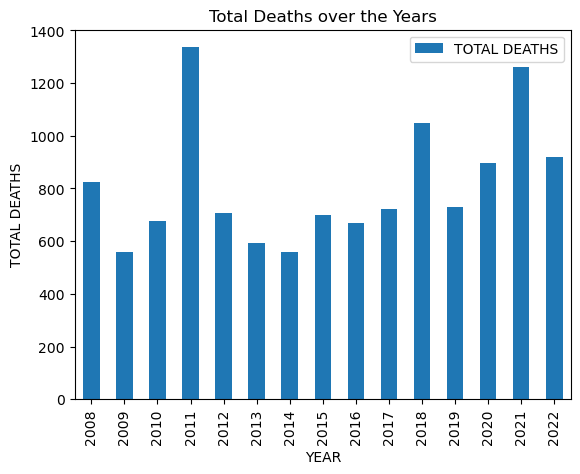

In [66]:
# Create a scatter plot for total deaths over the years 
deathsbyyear.plot(kind = "bar")
plt.title('Total Deaths over the Years')
plt.xlabel('YEAR')
plt.ylabel('TOTAL DEATHS')
plt.show()


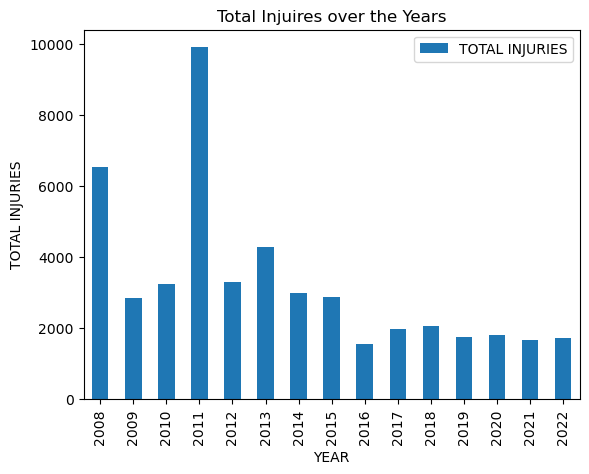

In [69]:
# Create a scatter plot for total injuries over the years 
injuriesbyyear.plot(kind = "bar")
plt.title('Total Injuires over the Years')
plt.xlabel('YEAR')
plt.ylabel('TOTAL INJURIES')
plt.show()

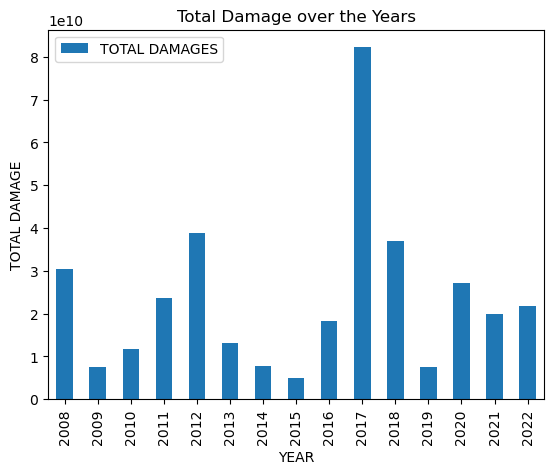

In [70]:
# Create a scatter plot for total damage over the years 
damagebyyear.plot(kind = "bar")
plt.title('Total Damage over the Years')
plt.xlabel('YEAR')
plt.ylabel('TOTAL DAMAGE')
plt.show()

In [104]:
fires_df = reordernarrow_df.loc[reordernarrow_df["EVENT_TYPE"] == "Wildfire", :]
fires_df.info()
fires_df.to_csv("fires.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 1539 entries, 490 to 230059
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                1539 non-null   int64  
 1   EPISODE_ID          1539 non-null   int64  
 2   EVENT_ID            1539 non-null   int64  
 3   STATE               1539 non-null   object 
 4   EVENT_TYPE          1539 non-null   object 
 5   TOTAL DEATHS        1539 non-null   int64  
 6   TOTAL INJURIES      1539 non-null   int64  
 7   TOTAL DAMAGES       1539 non-null   float64
 8   DAMAGE_PROPERTY     1539 non-null   float64
 9   DAMAGE_CROPS        1539 non-null   float64
 10  SOURCE              1539 non-null   object 
 11  MAGNITUDE           0 non-null      float64
 12  MAGNITUDE_TYPE      0 non-null      object 
 13  TOR_F_SCALE         0 non-null      object 
 14  TOR_LENGTH          0 non-null      float64
 15  TOR_WIDTH           0 non-null      float64
 16  TOR_OTH

In [78]:
fires_df.groupby("STATE").sum().sort_values("TOTAL INJURIES", ascending = False)

,YEAR,EPISODE_ID,EVENT_ID,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
STATE,,,,,,,,,,,,,,,,,,,,,
CALIFORNIA,461491,23038135,138365704,WildfireWildfireWildfireWildfireWildfireWildfi...,193,797,1.921731e+10,1.921719e+10,115000.0,Fire Department/RescueDepartment of HighwaysFi...,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
TEXAS,855078,26694146,159602552,WildfireWildfireWildfireWildfireWildfireWildfi...,22,129,5.976325e+08,5.855795e+08,12053000.0,Fire Department/RescueFire Department/RescuePa...,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
FLORIDA,62457,2815526,16865267,WildfireWildfireWildfireWildfireWildfireWildfi...,13,51,1.266470e+08,1.266470e+08,0.0,NewspaperPark/Forest ServiceEmergency ManagerE...,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
UTAH,78545,3411111,20482988,WildfireWildfireWildfireWildfireWildfireWildfi...,1,46,8.470900e+07,8.470900e+07,0.0,Park/Forest ServiceBroadcast MediaNewspaperBro...,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
NEW MEXICO,114851,5280336,31826899,WildfireWildfireWildfireWildfireWildfireWildfi...,3,43,2.572805e+08,2.572755e+08,5000.0,Other Federal AgencyOther Federal AgencyOther ...,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
NEBRASKA,74617,4263453,25719415,WildfireWildfireWildfireWildfireWildfireWildfi...,3,43,3.061820e+07,1.650300e+07,14115200.0,Emergency ManagerEmergency ManagerEmergency Ma...,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
OREGON,42361,2539567,15329247,WildfireWildfireWildfireWildfireWildfireWildfi...,16,40,1.628200e+07,1.624000e+07,42000.0,Other Federal AgencyFire Department/RescueBroa...,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
ARIZONA,88693,4564810,27511183,WildfireWildfireWildfireWildfireWildfireWildfi...,20,38,1.917490e+08,1.917490e+08,0.0,Law EnforcementPark/Forest ServiceState Offici...,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
OKLAHOMA,127017,6798064,40943303,WildfireWildfireWildfireWildfireWildfireWildfi...,8,32,6.768700e+07,6.766200e+07,25000.0,Park/Forest ServiceEmergency ManagerPark/Fores...,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0


In [102]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html
fire_count = fires_df[["EPISODE_ID", "STATE", "EVENT_TYPE"]].groupby("STATE").nunique()
fire_count

,EPISODE_ID,EVENT_TYPE
STATE,,
ALABAMA,2,1
ALASKA,5,1
ARIZONA,44,1
ARKANSAS,25,1
CALIFORNIA,191,1
COLORADO,58,1
DELAWARE,1,1
FLORIDA,30,1
GEORGIA,90,1


In [103]:
fire_count["EPISODE_ID"].sum()

1205

In [89]:
mergestorm_df.loc[mergestorm_df["EPISODE_ID"] ==58025,:]

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
737547,201109,4,1400,201109,7,1900,58025,348913,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hot and dry conditions across the region on th...,A fire began near Highway 287 in Mildred but s...,CSV
737548,201109,4,1300,201109,4,2100,58025,348914,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hot and dry conditions across the region on th...,A fire near Dawson burned 500 acres. This was ...,CSV
737549,201109,4,1400,201109,4,1900,58025,349011,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hot and dry conditions across the region on th...,A 600-acre grass fire burned in southwest Hopk...,CSV
746767,201109,4,1100,201109,14,1100,58025,349597,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hot and dry conditions across the region on th...,A 3000-acre fire in western Limestone County b...,CSV
747079,201109,4,1300,201109,4,1600,58025,348909,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hot and dry conditions across the region on th...,An animal on a power line sparked a grass fire...,CSV
748610,201109,4,1300,201109,5,1800,58025,347954,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hot and dry conditions across the region on th...,A 440-acre fire at FM 148 and CR 2613 near Liv...,CSV
748611,201109,5,1300,201109,5,1800,58025,347953,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hot and dry conditions across the region on th...,The Texas DEM reported a 6-acre fire at FM 314...,CSV
748612,201109,4,1300,201109,5,1800,58025,347955,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hot and dry conditions across the region on th...,The Oak Street Fire in Corsicana burned 30 acr...,CSV
748880,201109,5,900,201109,15,1930,58025,348005,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hot and dry conditions across the region on th...,Henderson #507 Fire burned 1400 acres and was ...,CSV
748881,201109,5,2302,201109,7,830,58025,348008,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hot and dry conditions across the region on th...,Henderson #504 Fire burned 503 acres and burne...,CSV
